In [1]:
import lightgbm as lig
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
dataset=pd.read_csv("data/transfusion_index.csv")
dataset.head()

,ID,Bone,Age,Race,Grade,T,N,Brain,Liver,Lung,Insurance,Marital
0,712,No,60,Black,II,1,N0,No,No,No,Yes,Yes
1,1013,No,80,White,III,1,N0,No,No,No,Yes,Yes
2,2726,No,66,White,II,1,N0,No,No,No,Yes,Yes
3,2790,No,60,White,II,1,N0,No,No,No,Yes,Yes
4,2904,No,58,White,III,2,N0,No,No,No,Yes,No


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 12 columns):
ID           203486 non-null int64
Bone         203486 non-null object
Age          203486 non-null int64
Race         203486 non-null object
Grade        203486 non-null object
T            203486 non-null int64
N            203486 non-null object
Brain        203486 non-null object
Liver        203486 non-null object
Lung         203486 non-null object
Insurance    203486 non-null object
Marital      203486 non-null object
dtypes: int64(3), object(9)
memory usage: 18.6+ MB


In [77]:
dataset.isnull().sum().sort_values(ascending=False)

Marital      0
Insurance    0
Lung         0
Liver        0
Brain        0
N            0
T            0
Grade        0
Race         0
Age          0
Bone         0
ID           0
dtype: int64

In [4]:
dataset["Bone"]=dataset["Bone"].map({"Yes":1,"No":0})

dataset["Brain"]=dataset["Brain"].map({"Yes":1,"No":0})
dataset["Liver"]=dataset["Liver"].map({"Yes":1,"No":0})
dataset["Lung"]=dataset["Lung"].map({"Yes":1,"No":0})
dataset["Insurance"]=dataset["Insurance"].map({"Yes":1,"No":0})
dataset["Marital"]=dataset["Marital"].map({"Yes":1,"No":0})
dataset["Race"]=dataset["Race"].map({"Black":0,"White":1,"Other (American Indian/AK Native, Asian/Pacific Islander)":3})
dataset["Grade"]=dataset["Grade"].map({"I":1,"II":2,"III":3,"IV":4})
dataset["N"]=dataset["N"].map({"N0":0,"N1":1})


In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 12 columns):
ID           203486 non-null int64
Bone         203486 non-null int64
Age          203486 non-null int64
Race         203486 non-null int64
Grade        203486 non-null int64
T            203486 non-null int64
N            203486 non-null int64
Brain        203486 non-null int64
Liver        203486 non-null int64
Lung         203486 non-null int64
Insurance    203486 non-null int64
Marital      203486 non-null int64
dtypes: int64(12)
memory usage: 18.6 MB


In [78]:
dataset
y=dataset["Bone"]
X=dataset.drop(columns=["Bone","ID"])
X

,Age,Race,Grade,T,N,Brain,Liver,Lung,Insurance,Marital
0,60,0,2,1,0,0,0,0,1,1
1,80,1,3,1,0,0,0,0,1,1
2,66,1,2,1,0,0,0,0,1,1
3,60,1,2,1,0,0,0,0,1,1
4,58,1,3,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
203481,80,1,2,1,0,0,0,0,1,1
203482,72,1,3,1,0,0,0,0,1,1
203483,68,1,2,2,0,0,0,0,1,1
203484,71,1,3,2,0,0,0,0,1,1


In [99]:
#lightgbm unbalance
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=lgb.LGBMClassifier(is_unbalance=True)
res1=model.fit(X_train,y_train)
y_pre=model.predict(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_pre)
roc_auc=auc(fpr,tpr)
print("f1_score:",f1_score(y_test,y_pre, average="weighted"))  
print("auc:",roc_auc)  
def aucc(y,y_pre):
    fpr,tpr,threshold=roc_curve(y,y_pre)
    roc_auc=auc(fpr,tpr)
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend(loc="lower right")
    

f1_score: 0.8438300779439308
auc: 0.7675740124003773


<Figure size 432x288 with 0 Axes>

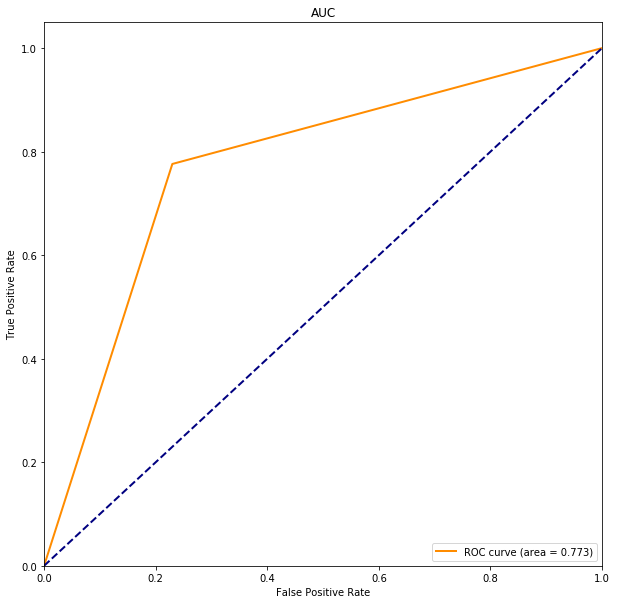

In [83]:
aucc(y_test,y_pre)

In [85]:
print(dataset["Bone"][dataset["Bone"]==0].count())
print(dataset["Bone"][dataset["Bone"]==1].count())

197700
5786


In [86]:
print(np.isfinite(X).all())
print(np.isinf(X).all())
#True：有缺失值
print(X.isnull().any())
print(np.isnan(X).any())


Age          True
Race         True
Grade        True
T            True
N            True
Brain        True
Liver        True
Lung         True
Insurance    True
Marital      True
dtype: bool
Age          False
Race         False
Grade        False
T            False
N            False
Brain        False
Liver        False
Lung         False
Insurance    False
Marital      False
dtype: bool
Age          False
Race         False
Grade        False
T            False
N            False
Brain        False
Liver        False
Lung         False
Insurance    False
Marital      False
dtype: bool
Age          False
Race         False
Grade        False
T            False
N            False
Brain        False
Liver        False
Lung         False
Insurance    False
Marital      False
dtype: bool


In [100]:
#过采样
from imblearn.over_sampling import SMOTE
smo= SMOTE(random_state=0)
X_smo, y_smo = smo.fit_resample(X_train, y_train)
X_smo.shape


(276818, 10)

In [101]:
#欠采样
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_rus.shape

(8062, 10)

In [114]:
import xgboost as xgb
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
xgb_model=xgb.XGBClassifier()
lgb_model=lgb.LGBMClassifier()
lr = LogisticRegression()
train_set=[]
test_set=[]
get_stacking=StackingClassifier(classifiers=[xgb_model,lgb_model],meta_classifier=lr)
for mol,label in zip([xgb_model, lgb_model, get_stacking], 
                       ['xgboost', 
                       'lightgbm', 
                        'StackingClassifier']):
    scores = model_selection.cross_val_score(mol,X_rus, y_rus,cv=5, scoring='accuracy')
get_stacking.fit(X_rus, y_rus)

y_prerus = get_stacking.predict(X_test)

In [115]:
fpr,tpr,threshold=roc_curve(y_test,y_prerus)
roc_auc=auc(fpr,tpr)
print("f1_score:",f1_score(y_test,y_prerus, average="weighted"))  
print("auc:",roc_auc)  

f1_score: 0.826297913920471
auc: 0.7625926949416182


<Figure size 432x288 with 0 Axes>

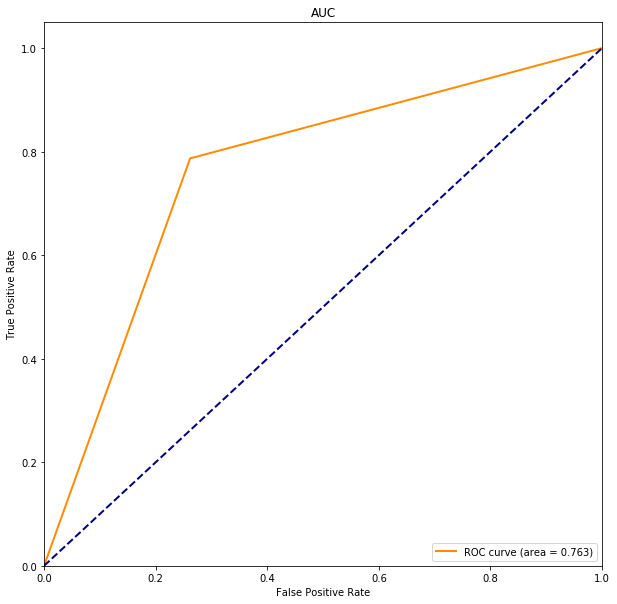

In [111]:
aucc(y_test,y_prerus)

In [117]:
#过采样

from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
smo= SMOTE(random_state=0)
X_smo, y_smo = smo.fit_resample(X_train, y_train)
X_smo.shape
xgb_model=xgb.XGBClassifier()
lgb_model=lgb.LGBMClassifier()
lr = LogisticRegression()
train_set=[]
test_set=[]
get_stacking=StackingClassifier(classifiers=[xgb_model,lgb_model],meta_classifier=lr)
get_stacking.fit(X_smo, y_smo)
y_presmo = get_stacking.predict(X_test)


f1_score: 0.8364280207167566
auc: 0.7662293288003768


<Figure size 432x288 with 0 Axes>

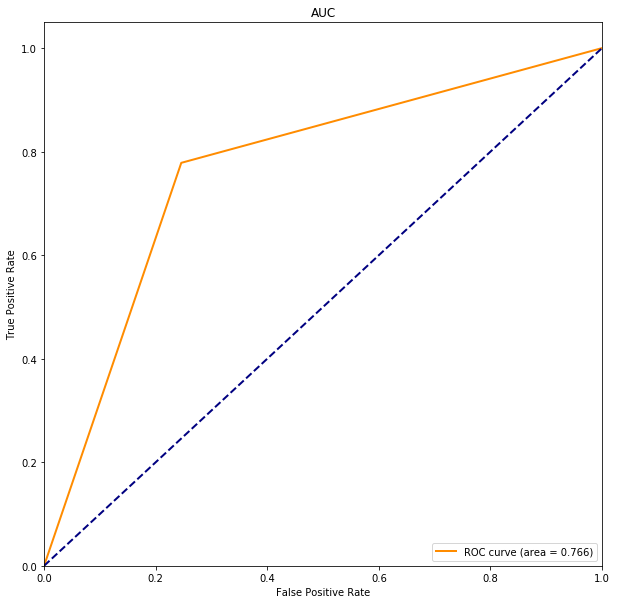

In [119]:
aucc(y_test,y_presmo)
fpr,tpr,threshold=roc_curve(y_test,y_presmo)
roc_auc=auc(fpr,tpr)
print("f1_score:",f1_score(y_test,y_presmo, average="weighted"))  
print("auc:",roc_auc)  

In [120]:
#lightgbm(focal loss)
import numpy as np
from sklearn.metrics import f1_score
import numpy as np

def custom_f1_eval(y_true, y_pred):
    eli=1e-9
    num_TP = 0
    threshold = 0.5
    num_pred=0
    for i in range(len(y_true)):
        if y_pred[i] >= 0.5:
            num_pred += 1
            if y_true[i] == 1:
                num_TP += 1
                
    precision = num_TP /(num_pred+eli)
    recall = num_TP / (len(y_true[y_true == 1])+eli)
    f1 = 2 * precision * recall / (precision + recall+eli)
    return "f1",np.mean(f1), True

def robust_pow(num_base,num_pow):
    return np.sign(num_base) * (np.abs(num_base)) ** (num_pow)
    
def focal_binary_object(y_true, pred):
        gamma_indct =1
        label = y_true
        sigmoid_pred = 1.0 / (1.0 + np.exp(-pred))
        g1 = sigmoid_pred * (1 - sigmoid_pred)
        g2 = label + ((-1) ** label) * sigmoid_pred
        g3 = sigmoid_pred + label - 1
        g4 = 1 - label - ((-1) ** label) * sigmoid_pred
        g5 = label + ((-1) ** label) * sigmoid_pred
        grad = gamma_indct * g3 * robust_pow(g2, gamma_indct) * np.log(g4 + 1e-9) + \
               ((-1) ** label) * robust_pow(g5, (gamma_indct + 1))
        hess_1 = robust_pow(g2, gamma_indct) + gamma_indct * ((-1) ** label) * g3 *robust_pow(g2, (gamma_indct - 1))
        hess_2 = ((-1) ** label) * g3 * robust_pow(g2, gamma_indct) / g4
        hess = ((hess_1 * np.log(g4 + 1e-9) - hess_2) * gamma_indct+(gamma_indct + 1) * robust_pow(g5, gamma_indct)) * g1

        return grad, hess

In [124]:
model3 = lgb.LGBMClassifier(random_state=33,
                         n_estimators=1000)
model3.set_params(**{"objective": focal_binary_object})
model3.fit(X_train, y_train, eval_set=[(X_test, y_test)],eval_metric="auc", verbose=False)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective=<function focal_binary_object at 0x000001CA471EC5E8>,
               random_state=33, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [125]:
y_f=model3.predict(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_f)
roc_auc=auc(fpr,tpr)
print("f1_score:",f1_score(y_test,y_f, average="weighted"))  
print("auc:",roc_auc)  

f1_score: 0.9625883588882783
auc: 0.5451960420078248


In [139]:
#lightgbm(dice_loss)
def sigmoid(inx):
    if inx>=0:    
        return 1.0/(1+exp(-inx))
    else:
        return exp(inx)/(1+exp(inx))
    
def dice_loss(y_true, y_pred):
    smooth=1
    p = 1.0 / (1.0 + np.exp(-y_pred))
    r=y_true
    p1 =p * (1 - p)
    g1=(p+r+smooth)
    g2= 1.0 + np.exp(-y_pred)**3
    g3= np.exp(-2 * y_pred) + 3 * np.exp(-y_pred)
    p2=g3/g2
    grad=(2*r*r*p1+smooth)/(g2**2)
    hess=(2*r*r*p*p2+2*r**3*p2-4*r*r*p1*p1)/(g1**3)
   
    return grad,hess

In [209]:
model4 = lgb.LGBMClassifier(random_state=33,
                         n_estimators=1000)
model4.set_params(**{"objective": dice_loss})
model4.fit(X_train, y_train, eval_set=[(X_test, y_test)],eval_metric='auc', verbose=False)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective=<function dice_loss at 0x000001CA308CC4C8>,
               random_state=33, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [210]:
y_d=model4.predict(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_d)
roc_auc=auc(fpr,tpr)
print("f1_score:",f1_score(y_test,y_d, average="weighted"))  
print("auc:",roc_auc)  

f1_score: 0.9573297353082777
auc: 0.5


In [184]:

#keras focal loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import tensorflow as tf
def focal_loss(gamma, alpha):
   
    gamma = float(gamma)
    alpha = float(alpha)
 
    def focal_loss_fixed(y_pred, y_true):
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)

    return focal_loss_fixed


In [205]:
from keras.models import Sequential
from keras.layers import Dense

model5 = Sequential()


model5.add(Dense(15, input_shape=(X_train.shape[1],), activation='relu'))
model5.add(Dense(30, activation='relu'))
model5.add(Dense(1,activation='sigmoid',name='output'))
model5.compile(optimizer="adam",loss=focal_loss(gamma=3,alpha=0.3),metrics=['accuracy'])

model5.summary()
model5.fit(X_train, y_train, epochs=20, batch_size=1000,verbose=0)
y_predk=model5.predict_classes(X_test,batch_size=1)


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_50 (Dense)             (None, 30)                480       
_________________________________________________________________
output (Dense)               (None, 1)                 31        
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


In [206]:
fpr,tpr,threshold=roc_curve(y_test,y_predk)
roc_auc=auc(fpr,tpr)
print("f1_score:",f1_score(y_test,y_predk, average="weighted"))  
print("auc:",roc_auc)  

f1_score: 0.9573297353082777
auc: 0.5
